In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [18]:
# Function to add Laplace noise to numeric columns of a pandas DataFrame.
def add_laplace_noise(data, scale):
    # Create a copy of the input data to prevent modifying the original dataset.
    noisy_data = data.copy()
    # Identify the numeric columns in the DataFrame.
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    # Generate Laplace noise for each numeric entry in the DataFrame.
    noise = np.random.laplace(0, scale, size=(data.shape[0], len(numeric_cols)))
    # Add the generated noise to the numeric columns of the DataFrame.
    noisy_data[numeric_cols] += noise
    # Return the modified DataFrame with added noise.
    return noisy_data

In [27]:
def apply_differential_privacy(file_path, noise_scale, noise_percentage):
    import pandas as pd
    import numpy as np

    # Read the dataset from a CSV file into a pandas DataFrame.
    dataset = pd.read_csv(file_path)

    # Create a mask to randomly select a subset of the dataset to which noise will be added.
    mask = np.random.choice([True, False], size=len(dataset), p=[noise_percentage, 1 - noise_percentage])

    # Apply Laplace noise to the randomly selected subset of the dataset.
    noisy_subset = add_laplace_noise(dataset.loc[mask], noise_scale)

    # Cast the noisy subset to match the data types of the original dataset.
    dataset.loc[mask] = noisy_subset.astype(dataset.dtypes)

    # Create a file path for the noisy dataset that includes the noise scale and percentage in the file name.
    noisy_dataset_path = f"/content/drive/My Drive/metadata_Noisy_Scale{noise_scale}_Perc{noise_percentage}.csv"

    # Save the modified dataset with noise added to a new CSV file.
    dataset.to_csv(noisy_dataset_path)

In [28]:
# Set the noise scale and percentage parameters for differential privacy.
noise_scale = 0.9  # The amount of noise added to the data (higher values result in more noise and more privacy).
noise_percentage = 0.6  # The fraction of the dataset to which noise will be applied.


In [29]:
# Apply differential privacy to the dataset using the specified parameters.
apply_differential_privacy("/content/drive/MyDrive/metadata.csv", noise_scale, noise_percentage)

In [30]:
# Import pandas again for clarity, although it is not necessary since it's already imported above.
import pandas as pd

In [31]:
# Define paths to the original and noisy datasets.
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"

In [32]:
# Load the original and noisy datasets to compare them.
original_dataset = pd.read_csv(original_dataset_path)
noisy_dataset = pd.read_csv(noisy_dataset_path)

In [33]:
# Identify the numeric and non-numeric columns in the original dataset.
numeric_cols = original_dataset.select_dtypes(include='number').columns
non_numeric_cols = original_dataset.select_dtypes(exclude='number').columns

In [34]:
# Compare the mean of the numeric columns in the original and noisy datasets to verify noise addition.
print("Original Dataset Mean:")
print(original_dataset[numeric_cols].mean())
print("\nNoisy Dataset Mean:")
print(noisy_dataset[numeric_cols].mean())

Original Dataset Mean:
offset               9.083214
age                 53.534362
temperature         38.898718
pO2_saturation      78.475630
leukocyte_count      5.024375
neutrophil_count     5.307143
lymphocyte_count     4.638050
dtype: float64

Noisy Dataset Mean:
offset               9.133678
age                 53.582221
temperature         38.799963
pO2_saturation      78.385489
leukocyte_count      4.700890
neutrophil_count     5.273030
lymphocyte_count     4.653476
dtype: float64


In [35]:
# Verify that the non-numeric columns have not been modified by the noise addition process.
for col in non_numeric_cols:
    if not original_dataset[col].equals(noisy_dataset[col]):
        print(f"Column {col} has been modified.")
    else:
        print(f"Column {col} remains unchanged.")

Column patientid remains unchanged.
Column sex remains unchanged.
Column finding remains unchanged.
Column RT_PCR_positive remains unchanged.
Column survival remains unchanged.
Column intubated remains unchanged.
Column intubation_present remains unchanged.
Column went_icu remains unchanged.
Column in_icu remains unchanged.
Column needed_supplemental_O2 remains unchanged.
Column extubated remains unchanged.
Column view remains unchanged.
Column modality remains unchanged.
Column date remains unchanged.
Column location remains unchanged.
Column folder remains unchanged.
Column filename remains unchanged.
Column doi remains unchanged.
Column url remains unchanged.
Column license remains unchanged.
Column clinical_notes remains unchanged.
Column other_notes remains unchanged.
Column Unnamed: 29 remains unchanged.


# To visually compare the original and noisy datasets

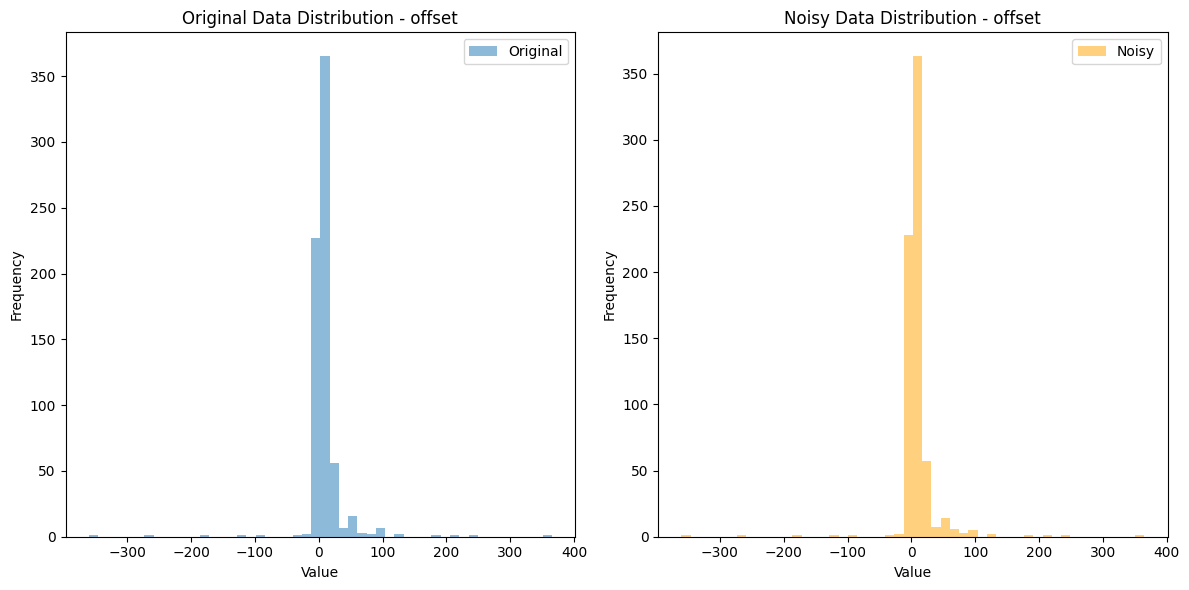

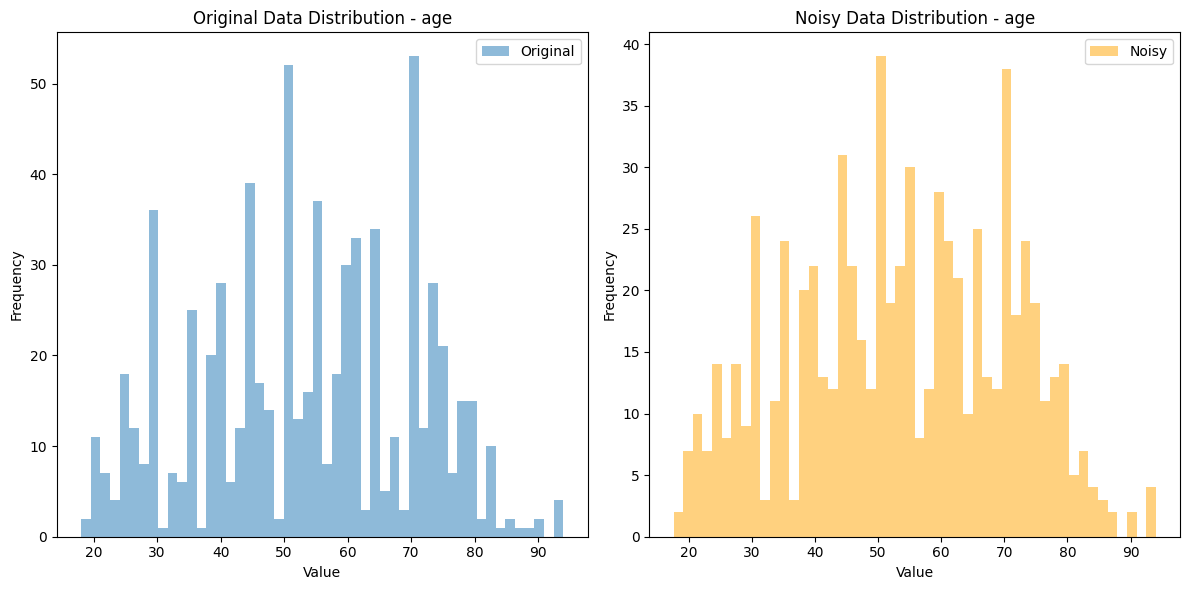

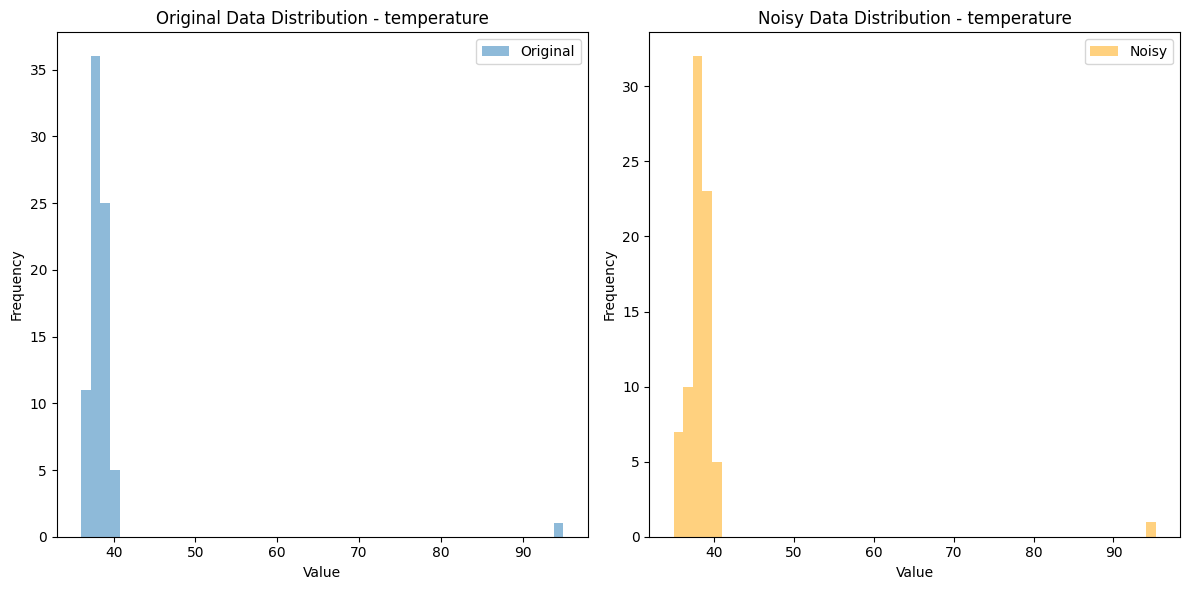

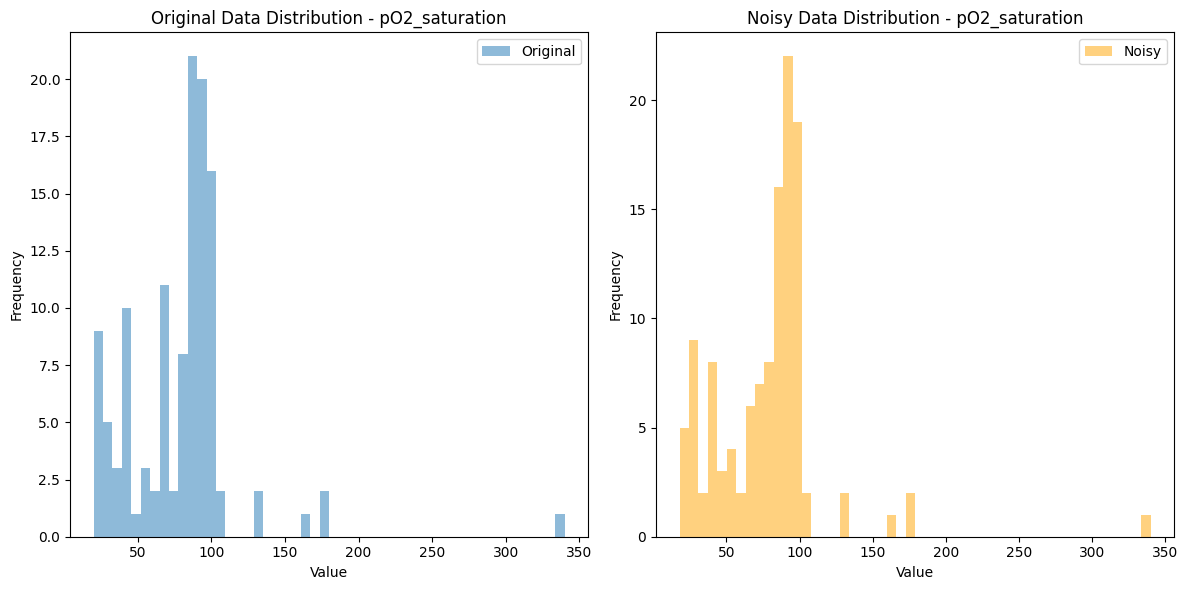

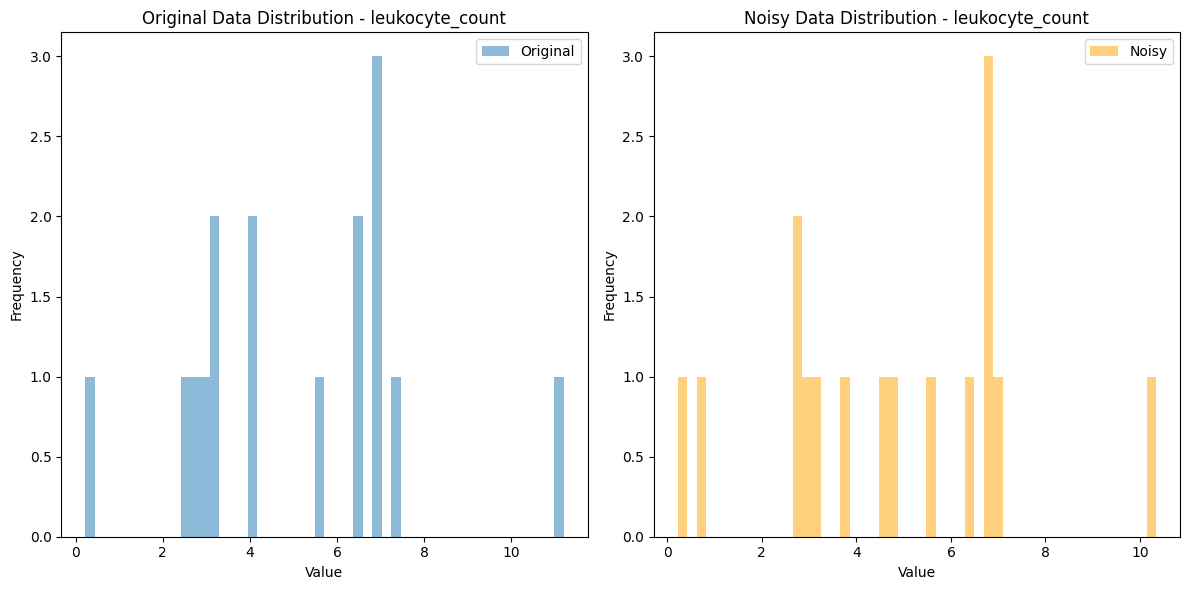

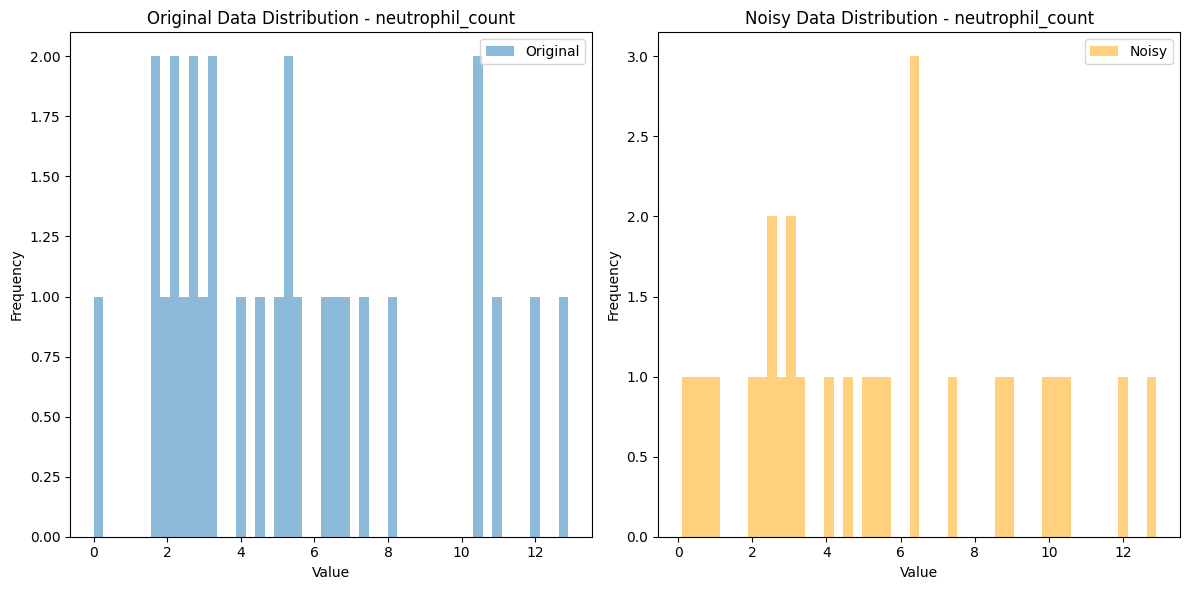

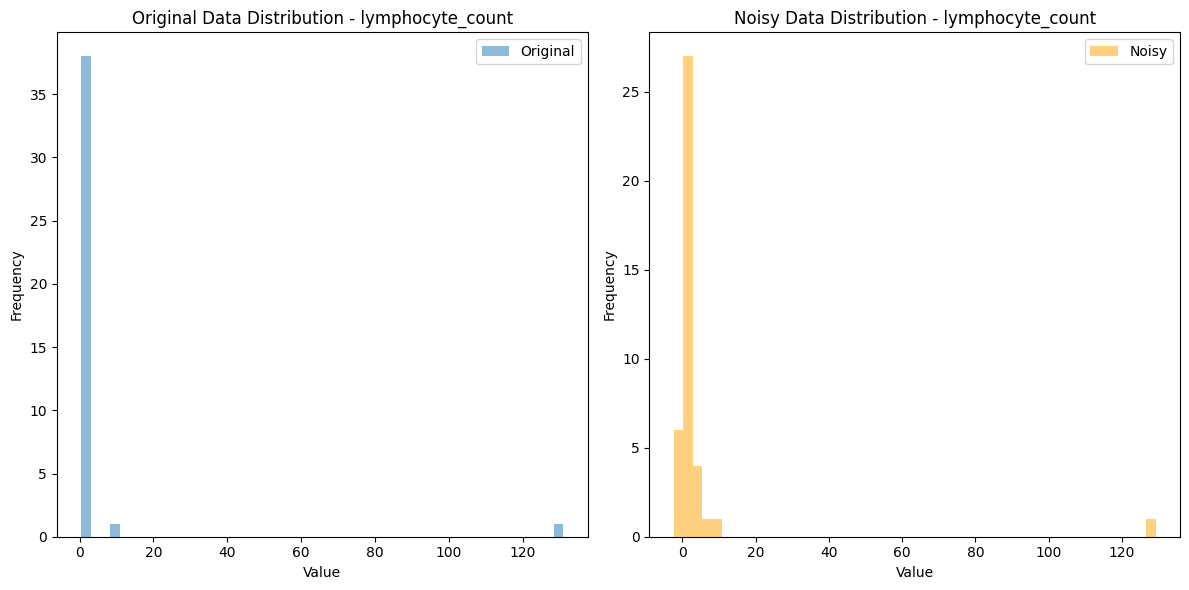

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"
original_dataset = pd.read_csv(original_dataset_path)
noisy_dataset = pd.read_csv(noisy_dataset_path)

# Identify numeric columns for comparison
numeric_cols = original_dataset.select_dtypes(include='number').columns

# Plot histograms for each numeric column in the original and noisy datasets
for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Original data histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.hist(original_dataset[col].dropna(), bins=50, alpha=0.5, label='Original')
    plt.title(f'Original Data Distribution - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Noisy data histogram
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.hist(noisy_dataset[col].dropna(), bins=50, alpha=0.5, label='Noisy', color='orange')
    plt.title(f'Noisy Data Distribution - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


# The plot scatter plots or pair plots to visualize relationships between different numeric columns and how noise affects these relationships.

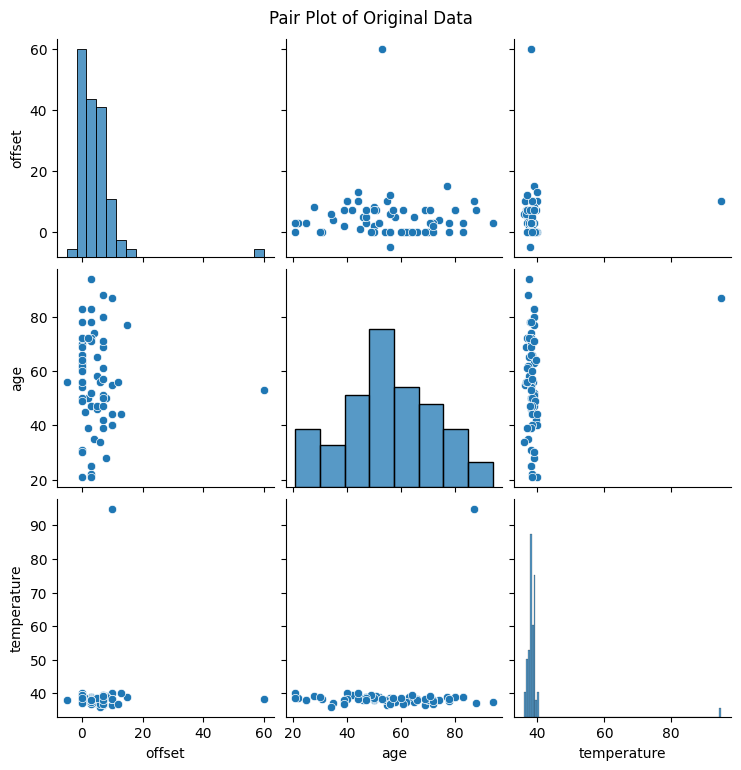

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

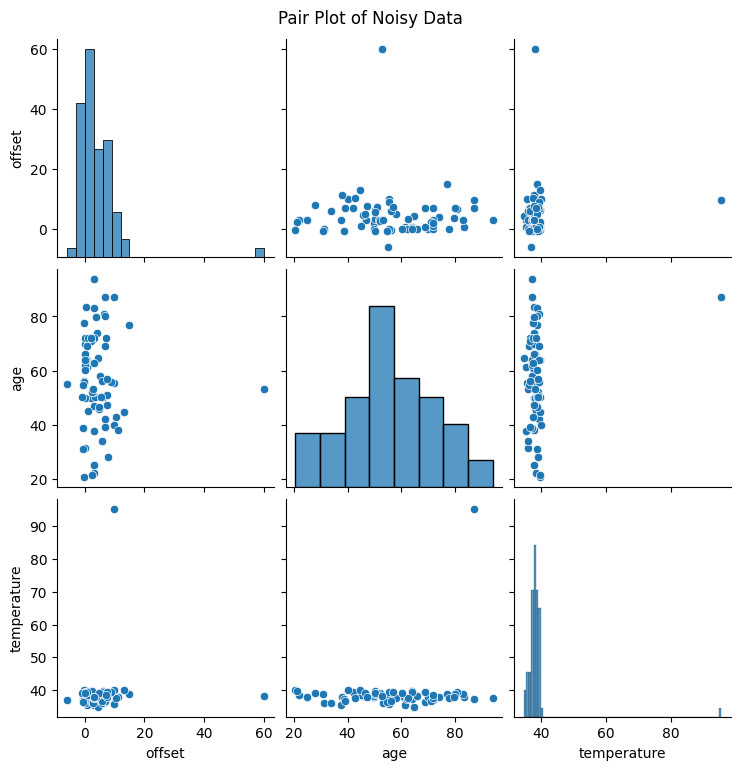

In [38]:
import seaborn as sns

# Select a subset of columns if there are too many to visualize effectively
selected_columns = numeric_cols[:3]  # Adjust the number of columns you'd like to visualize

# Pair plot for the original dataset
sns.pairplot(original_dataset[selected_columns].dropna())
plt.suptitle('Pair Plot of Original Data', y=1.02)  # Adjust the y parameter for title positioning
plt.show()

# Pair plot for the noisy dataset
sns.pairplot(noisy_dataset[selected_columns].dropna(), palette='orange')
plt.suptitle('Pair Plot of Noisy Data', y=1.02)  # Adjust the y parameter for title positioning
plt.show()


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load datasets
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"
original_dataset = pd.read_csv(original_dataset_path)
noisy_dataset = pd.read_csv(noisy_dataset_path)

# Assuming 'finding' is the target column
target_column = 'finding'

# Clean NaN values from the target column or impute
original_dataset.dropna(subset=[target_column], inplace=True)
noisy_dataset.dropna(subset=[target_column], inplace=True)

# Encode the target variable if it's categorical
original_dataset[target_column] = original_dataset[target_column].astype('category').cat.codes
noisy_dataset[target_column] = noisy_dataset[target_column].astype('category').cat.codes

# Identify categorical and numerical columns excluding the target column
categorical_features = original_dataset.select_dtypes(include=['object', 'bool']).columns.tolist()
if target_column in categorical_features:
    categorical_features.remove(target_column)  # Remove the target column from the feature list if present

numerical_features = original_dataset.select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
if target_column in numerical_features:
    numerical_features.remove(target_column)  # Remove the target column from the feature list if present

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Prepare the data
X_orig = original_dataset.drop(columns=[target_column])
y_orig = original_dataset[target_column]
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_orig, y_train_orig)

# Evaluate the model
y_pred_val_orig = model.predict(X_val_orig)
accuracy_orig = accuracy_score(y_val_orig, y_pred_val_orig)
print(f'Validation Accuracy on Original Data: {accuracy_orig:.4f}')




Validation Accuracy on Original Data: 0.9263


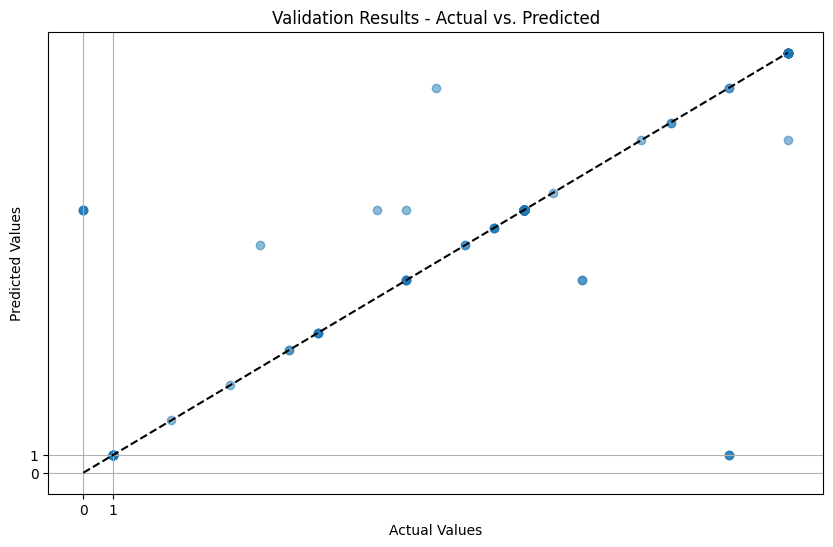

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the evaluation part has been completed and `y_pred_val_orig` and `y_val_orig` are defined

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_orig, y_pred_val_orig, alpha=0.5)
plt.title('Validation Results - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a line representing the perfect predictions
max_val = max(y_val_orig.max(), y_pred_val_orig.max())
min_val = min(y_val_orig.min(), y_pred_val_orig.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # Black dashed line

# Improve readability by adjusting ticks for a binary classification case
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)

plt.show()


Validation Accuracy on Original Data: 0.9263


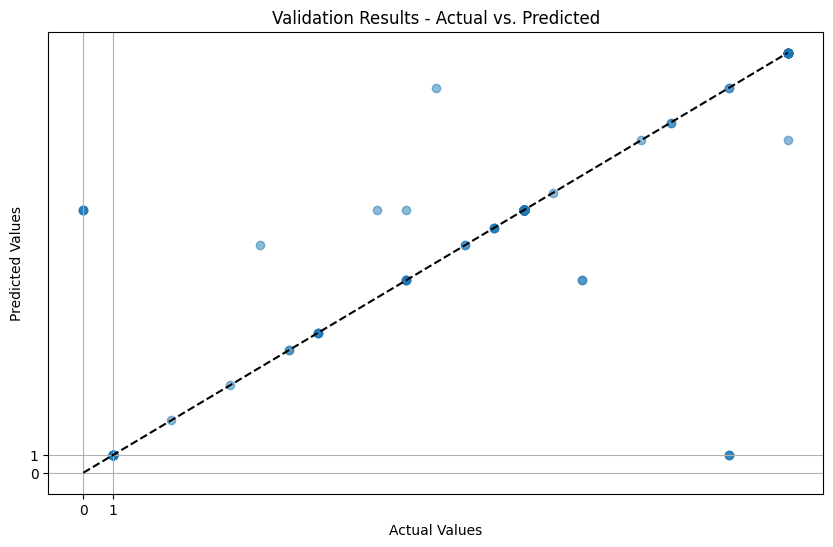

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load datasets
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"
original_dataset = pd.read_csv(original_dataset_path)
noisy_dataset = pd.read_csv(noisy_dataset_path)

# Assuming 'finding' is the target column
target_column = 'finding'

# Clean NaN values from the target column or impute
original_dataset.dropna(subset=[target_column], inplace=True)
noisy_dataset.dropna(subset=[target_column], inplace=True)

# Encode the target variable if it's categorical
original_dataset[target_column] = original_dataset[target_column].astype('category').cat.codes
noisy_dataset[target_column] = noisy_dataset[target_column].astype('category').cat.codes

# Identify categorical and numerical columns excluding the target column
categorical_features = original_dataset.select_dtypes(include=['object', 'bool']).columns.tolist()
if target_column in categorical_features:
    categorical_features.remove(target_column)  # Remove the target column from the feature list if present

numerical_features = original_dataset.select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
if target_column in numerical_features:
    numerical_features.remove(target_column)  # Remove the target column from the feature list if present

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Prepare the data
X_orig = original_dataset.drop(columns=[target_column])
y_orig = original_dataset[target_column]
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_orig, y_train_orig)

# Evaluate the model
y_pred_val_orig = model.predict(X_val_orig)
accuracy_orig = accuracy_score(y_val_orig, y_pred_val_orig)
print(f'Validation Accuracy on Original Data: {accuracy_orig:.4f}')



import matplotlib.pyplot as plt
import numpy as np

# Assuming the evaluation part has been completed and `y_pred_val_orig` and `y_val_orig` are defined

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_orig, y_pred_val_orig, alpha=0.5)
plt.title('Validation Results - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a line representing the perfect predictions
max_val = max(y_val_orig.max(), y_pred_val_orig.max())
min_val = min(y_val_orig.min(), y_pred_val_orig.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # Black dashed line

# Improve readability by adjusting ticks for a binary classification case
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)

plt.show()



Validation Accuracy on Original Data: 0.9263
Validation Accuracy on Noisy Data: 0.9263


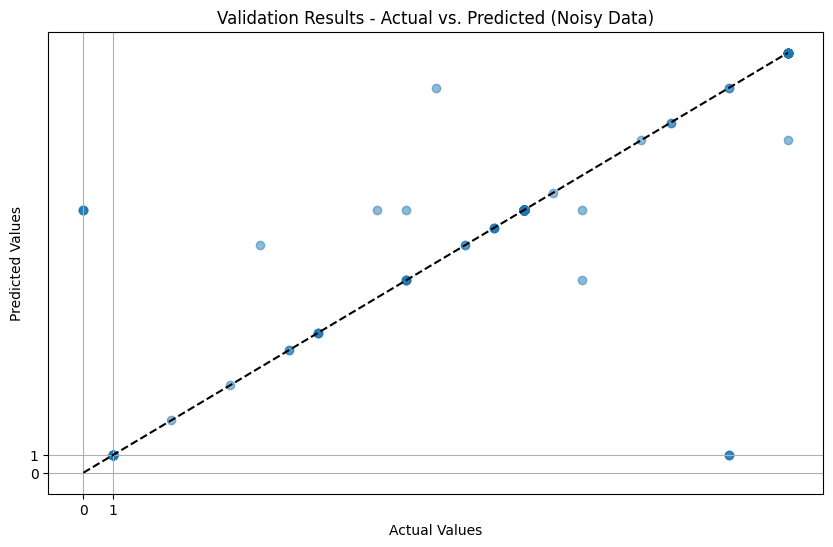

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load datasets
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"
original_dataset = pd.read_csv(original_dataset_path)
noisy_dataset = pd.read_csv(noisy_dataset_path)

# Assuming 'finding' is the target column
target_column = 'finding'

# Clean NaN values from the target column or impute
original_dataset.dropna(subset=[target_column], inplace=True)
noisy_dataset.dropna(subset=[target_column], inplace=True)

# Encode the target variable if it's categorical
original_dataset[target_column] = original_dataset[target_column].astype('category').cat.codes
noisy_dataset[target_column] = noisy_dataset[target_column].astype('category').cat.codes

# Identify categorical and numerical columns excluding the target column
categorical_features = original_dataset.select_dtypes(include=['object', 'bool']).columns.tolist()
if target_column in categorical_features:
    categorical_features.remove(target_column)  # Remove the target column from the feature list if present

numerical_features = original_dataset.select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
if target_column in numerical_features:
    numerical_features.remove(target_column)  # Remove the target column from the feature list if present

# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Prepare the original data
X_orig = original_dataset.drop(columns=[target_column])
y_orig = original_dataset[target_column]
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Train the model on original data
model.fit(X_train_orig, y_train_orig)

# Evaluate the model on original data
y_pred_val_orig = model.predict(X_val_orig)
accuracy_orig = accuracy_score(y_val_orig, y_pred_val_orig)
print(f'Validation Accuracy on Original Data: {accuracy_orig:.4f}')

# Prepare the noisy data
X_noisy = noisy_dataset.drop(columns=[target_column])
y_noisy = noisy_dataset[target_column]
X_train_noisy, X_val_noisy, y_train_noisy, y_val_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

# Evaluate the model on noisy data
y_pred_val_noisy = model.predict(X_val_noisy)
accuracy_noisy = accuracy_score(y_val_noisy, y_pred_val_noisy)
print(f'Validation Accuracy on Noisy Data: {accuracy_noisy:.4f}')

# Plotting the actual vs. predicted values for the noisy dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_val_noisy, y_pred_val_noisy, alpha=0.5)
plt.title('Validation Results - Actual vs. Predicted (Noisy Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a line representing the perfect predictions
max_val_noisy = max(y_val_noisy.max(), y_pred_val_noisy.max())
min_val_noisy = min(y_val_noisy.min(), y_pred_val_noisy.min())
plt.plot([min_val_noisy, max_val_noisy], [min_val_noisy, max_val_noisy], 'k--')  # Black dashed line

# Improve readability by adjusting ticks for a binary classification case
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)

plt.show()


Epoch 1/70
9/9 [==============================] - 6s 214ms/step - loss: 0.7951 - accuracy: 0.4653 - val_loss: 0.7890 - val_accuracy: 0.4521
Epoch 2/70
9/9 [==============================] - 0s 14ms/step - loss: 0.7883 - accuracy: 0.5729 - val_loss: 0.7823 - val_accuracy: 0.6301
Epoch 3/70
9/9 [==============================] - 0s 18ms/step - loss: 0.7788 - accuracy: 0.6771 - val_loss: 0.7759 - val_accuracy: 0.7123
Epoch 4/70
9/9 [==============================] - 0s 15ms/step - loss: 0.7757 - accuracy: 0.7083 - val_loss: 0.7697 - val_accuracy: 0.7260
Epoch 5/70
9/9 [==============================] - 0s 10ms/step - loss: 0.7641 - accuracy: 0.7778 - val_loss: 0.7639 - val_accuracy: 0.7260
Epoch 6/70
9/9 [==============================] - 0s 7ms/step - loss: 0.7557 - accuracy: 0.7917 - val_loss: 0.7577 - val_accuracy: 0.7260
Epoch 7/70
9/9 [==============================] - 0s 12ms/step - loss: 0.7449 - accuracy: 0.7986 - val_loss: 0.7519 - val_accuracy: 0.7260
Epoch 8/70
9/9 [===========

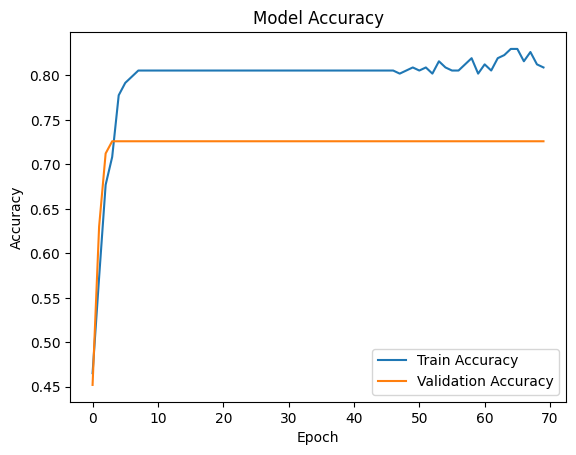

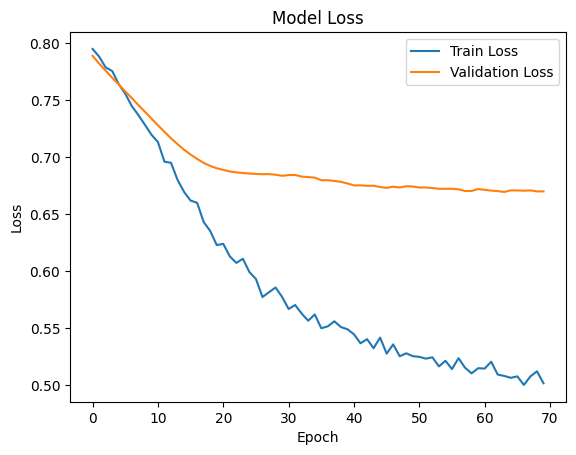

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Add this import
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
original_dataset_path = "/content/drive/MyDrive/metadata.csv"
original_dataset = pd.read_csv(original_dataset_path)

# Clean and encode the target column
original_dataset.dropna(subset=['survival'], inplace=True)
original_dataset['survival'] = original_dataset['survival'].astype('category').cat.codes

# Select numerical features only
numerical_features = original_dataset.select_dtypes(include=[np.number]).columns.tolist()
if 'survival' in numerical_features:
    numerical_features.remove('survival')

# Split the dataset into features and target
X = original_dataset[numerical_features]
y = original_dataset['survival']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handle potential `inf` or `nan` values
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_val_scaled = np.nan_to_num(X_val_scaled, nan=0.0, posinf=0.0, neginf=0.0)

# Reshape for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

# Initialize the CNN model with regularization
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a lower learning rate
model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Change to binary_crossentropy for binary classification
              metrics=['accuracy'])

# Define early stopping callback
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with a higher number of epochs
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=70, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping_cnn], verbose=1)

# Evaluate the model
val_loss_cnn, val_accuracy_cnn = model_cnn.evaluate(X_val_reshaped, y_val)
print(f'CNN Model Validation Accuracy: {val_accuracy_cnn:.4f}')
print(f'CNN Model Validation Loss: {val_loss_cnn:.4f}')



# Plotting
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/200
9/9 [==============================] - 2s 58ms/step - loss: 0.8252 - accuracy: 0.4826 - val_loss: 0.8192 - val_accuracy: 0.6164
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.8130 - accuracy: 0.6250 - val_loss: 0.8108 - val_accuracy: 0.7123
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7996 - accuracy: 0.7292 - val_loss: 0.8031 - val_accuracy: 0.7260
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.7893 - accuracy: 0.7743 - val_loss: 0.7953 - val_accuracy: 0.7260
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7772 - accuracy: 0.8056 - val_loss: 0.7875 - val_accuracy: 0.7260
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7658 - accuracy: 0.8090 - val_loss: 0.7802 - val_accuracy: 0.7260
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.7553 - accuracy: 0.8056 - val_loss: 0.7730 - val_accuracy: 0.7260
Epoch 8/200
9/9 [=========

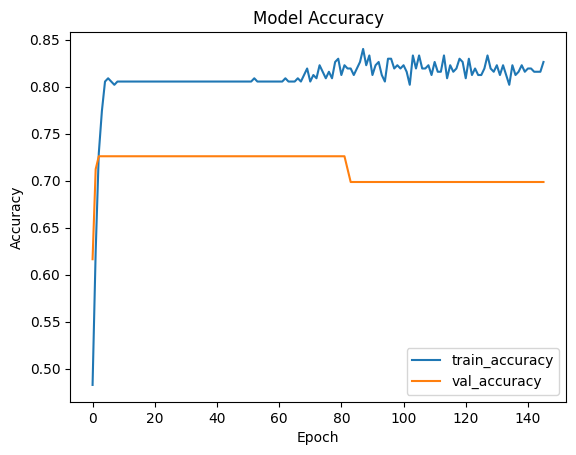

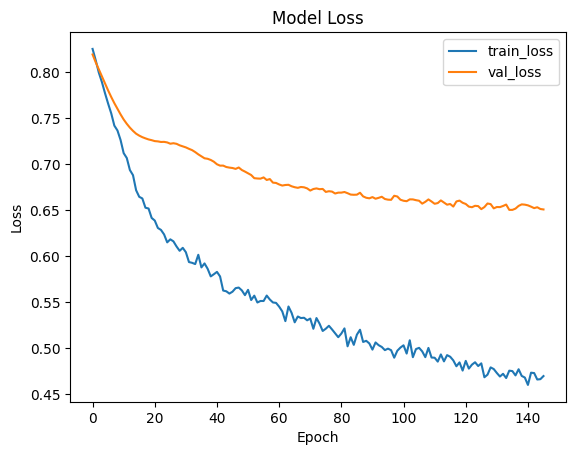

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the noisy dataset
noisy_dataset_path = "/content/drive/MyDrive/metadata_Noisy_Scale0.9_Perc0.6.csv"
noisy_dataset = pd.read_csv(noisy_dataset_path)

# Clean and encode the target column
noisy_dataset.dropna(subset=['survival'], inplace=True)
noisy_dataset['survival'] = noisy_dataset['survival'].astype('category').cat.codes

# Select numerical features only
numerical_features = noisy_dataset.select_dtypes(include=[np.number]).columns.tolist()
if 'survival' in numerical_features:
    numerical_features.remove('survival')

# Split the dataset into features and target
X = noisy_dataset[numerical_features]
y = noisy_dataset['survival']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handle potential `inf` or `nan` values
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_val_scaled = np.nan_to_num(X_val_scaled, nan=0.0, posinf=0.0, neginf=0.0)

# Reshape for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

# Initialize the CNN model with regularization
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a lower learning rate
model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Change to binary_crossentropy for binary classification
              metrics=['accuracy'])

# Define early stopping callback
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with a higher number of epochs
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=200, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping_cnn], verbose=1)

# Evaluate the model
val_loss_cnn, val_accuracy_cnn = model_cnn.evaluate(X_val_reshaped, y_val)
print(f'CNN Model Validation Accuracy: {val_accuracy_cnn:.4f}')
print(f'CNN Model Validation Loss: {val_loss_cnn:.4f}')

# Plotting
plt.plot(history_cnn.history['accuracy'], label='train_accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
